## Tipos de datos 

### Primitivos

In [2]:
from datetime import datetime

integer_type = 42
float_type = 3.14159
bool_type = False
hex_type = 0xff
oct_type = 0o23
today = datetime.now()
str_type = 'Hola'



### Estructurados

Aqui vamos a pegar una tabla MySQL. Todo perfectamente estructurado con columnas, filas, ids. Cuando tenemos datos en este tipo de formato podemos manipularlos muy facilmente

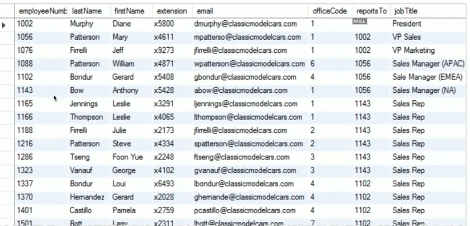

### Semiestructurados

Por ejemplo, podriamos hablar de los datos HTML. Estos serian datos que tienen su estructura pero no hay una estructura basica a la cual podemos dirigirnos.

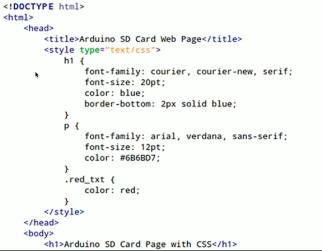

### No estructurados

Texto libre. Libros, cvs, etc

## Realizar solicitudes a la web

In [1]:
# Importamos la libreria

import requests

# Podemos usar verbos. Usaremos el metodo get que nos devuelve un objeto response que almacenamos
response = requests.get('https://www.platzi.com')

# Para saber que hay dentro, podemos usar los trucos de jupyter de poner response? o response?? 
response?

In [2]:
# Vemos que es un tipo Response, tiene la forma Response[200] por la respuesta de la solicitud. 
# Con el doble signo de interrogacion podemos ver mas documentacion.
# Tambien podemos ver los metodos que podemos usar

print(dir(response))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [3]:
response.status_code

200

In [5]:
response.headers

{'Date': 'Sun, 07 Feb 2021 22:43:37 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=dcf8effc9952dd0634411848a36fa15171612737817; expires=Tue, 09-Mar-21 22:43:37 GMT; path=/; domain=.platzi.com; HttpOnly; SameSite=Lax', 'CF-Ray': '61e0a1815c7a3714-MIA', 'Access-Control-Allow-Origin': '*', 'Age': '1678', 'Cache-Control': 'no-store', 'Expires': 'Mon, 07 Feb 2022 22:43:37 GMT', 'Strict-Transport-Security': 'max-age=86400; includeSubDomains', 'Vary': 'Accept-Encoding', 'CF-Cache-Status': 'HIT', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'X-Requested-With,content-type,X-CSRFToken', 'Access-Control-Allow-Methods': 'GET, POST', 'cf-request-id': '08204344e50000371430052000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'X-Content-Type-Options': 'nosniff', 'X-DNS-Prefetch-Control': 'off', 'X-Download-Options': 'noopen', 'X-Frame-

In [6]:
response.headers['Date']

'Sun, 07 Feb 2021 22:43:37 GMT'

In [7]:
# Veamos el contenido de text que tiene. En este caso, es un documento tipo HTML con codigo minimizado
response.text

'\n    <!doctype html>\n      <html lang=es>\n        <head>\n          <meta charset="UTF-8">\n          \n          <meta name="viewport" content="width=device-width, initial-scale=1" />\n          <meta name="referrer" content="no-referrer-when-downgrade">\n          <title>Platzi: â\x80\x8eCursos Online Profesionales de TecnologÃ\xada</title>\n          <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-svg-core@1.2.28/styles.css">\n          <link rel="stylesheet" href="https://static.platzi.com/mf-landings/assets/home-public.3d5b6b1d7f6f0952fa54.css" type="text/css" />\n          <link rel="preload" as="style" href="https://static.platzi.com/mf-landings/assets/vendors.3d5b6b1d7f6f0952fa54.css" onload="this.onload=null;this.rel=\'stylesheet\'" />\n          <noscript><link rel="stylesheet" href="https://static.platzi.com/mf-landings/assets/vendors.3d5b6b1d7f6f0952fa54.css"></noscript>\n          <link rel="preload" as="style" href="https://static.pl

## Cómo trabajar con un documento HTML
### Extracción de informacion del HTML

In [8]:
# Importamos la libreria de beautifulsoup
import bs4

# A beautifulsoup le pasamos el documento html (que ya esta en response) y el tipo de parser que debe usar
# porque, ademas de html, tambien manipula documentos tipo xml
soup = bs4.BeautifulSoup(response.text,'html.parser')

print(soup.title.text)

Platzi: âCursos Online Profesionales de TecnologÃ­a


In [9]:
# Vamos a mejorar el encoding
response.encoding = 'utf-8'

In [11]:
# Apliquemos de nuevo nuestro codigo
soup = bs4.BeautifulSoup(response.text,'html.parser')
print(soup.title.text)

Platzi: ‎Cursos Online Profesionales de Tecnología


In [12]:
# Podemos usar un selector de CSS

print(soup.select('meta[name=description]'))

[<meta content="Aprende desde cero a crear el futuro web con nuestros Cursos Online Profesionales de Tecnología. 🚀¡Cursos de Desarrollo, Diseño, Marketing y Negocios!" name="description"/>]


In [14]:
# Vamos a imprimir las escuelas que tiene platzi. para ello, usamos un selector
escuelas_links = soup.select('.SchoolsList-school')
escuelas = [escuela['href'] for escuela in escuelas_links]

for escuela in escuelas:
    print(escuela)

/periodismo-digital/
/desarrollo-profesional/
/ecommerce/
/diseno-grafico/
/diseno-producto/
/startups/
/web/
/finanzas/
/matematicas/
/publicidad/
/negocios/
/videojuegos/
/idioma-ingles/
/datos/
/azure/
/produccion-video/
/marketing-digital/
/software/


In [15]:
# Vemos que escuelas links tiene toda la informacion que se encontro con el nodo que le indicamos
escuelas_links
# Luego, como esto es una lista de varios elementos, podeos iterarla y pedir que traiga lo que contiene
# href (como un diccionario) para cada elemento en la lista (que corresponde a cada escuela)

[<a class="SchoolsList-school" href="/periodismo-digital/" style="background-color:#BBCFF0;background-image:url(https://static.platzi.com/media/learningpath/ghosts/7abf1075-51c4-4743-b402-89972b82424c.jpg)" target="_blank"><img alt="school-emblem" loading="lazy" src="https://static.platzi.com/media/learningpath/emblems/9020f852-2b90-410e-afda-8b4ae5fc6b36.jpg"/><div class="SchoolsList-school-description"><span>Escuela de</span><h4>Periodismo Digital</h4></div></a>,
 <a class="SchoolsList-school" href="/desarrollo-profesional/" style="background-color:#FF6363;background-image:url(https://static.platzi.com/media/learningpath/ghosts/3ed7bed4-c3a6-4947-ba6b-2c295a411cef.jpg)" target="_blank"><img alt="school-emblem" loading="lazy" src="https://static.platzi.com/media/learningpath/emblems/3a7d2518-de34-42f1-aaa8-dd48a53c8ab5.jpg"/><div class="SchoolsList-school-description"><span>Escuela de</span><h4>Desarrollo Profesional</h4></div></a>,
 <a class="SchoolsList-school" href="/ecommerce/" st

In [1]:
# Tomaremos los titulos de las noticias de la pagina principal de Robotitus
import requests
import bs4
url = 'https://www.bbc.com/mundo'

# Hacemos una peticion y almacenamos el contenido html

response = requests.get(url)
response.encoding = 'utf-8'

# ahora guardamos esto en un bs4

soup = bs4.BeautifulSoup(response.text,'html.parser')




In [3]:
soup.title.text

'Noticias - BBC News Mundo'